In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pyfastaq.sequences import file_reader as fasta_reader
import swifter
import os

In [2]:
import sys
sys.path.insert(1, '..')
sys.path.insert(2, '../bindmate')

import bindmate

R[write to console]: Bioconductor version 3.16 (BiocManager 1.30.22), R 4.2.3 (2023-03-15)

R[write to console]: Bioconductor version '3.16' is out-of-date; the current release version '3.18'
  is available with R version '4.3'; see https://bioconductor.org/install



In [30]:
from scipy import optimize
from scipy import stats

In [3]:
from bindmate.kmer_to_kmer_matchscores import ProbabilityModel, EMOptimizer

In [4]:
# get input data
output_dir = 'MULTIMODEL_MOREMETRICS__BIODATA__n:200:200__l:300__MYC-human_ENCFF002DBF:NANOG-human_ENCFF735WFO__results'
kmers_file = "metric_ranks.csv"
about_file = "mapped_kmers_df.csv.gz"

overarch = "../../../biological_data/more_metrics_results/"

In [5]:
def get_type(ident1, ident2):
    if (ident1 == ident2):
        return ident1
    else:
        return f"{ident1}:{ident2}"
    
path_kmers = os.path.join(overarch, output_dir, kmers_file)
path_about = os.path.join(overarch, output_dir, about_file)
first = "MYC"
second = "NANOG"

kmer_ranks = pd.read_csv(path_kmers)
kmer_ranks = kmer_ranks[kmer_ranks['kmer_index_1'] != kmer_ranks['kmer_index_2']]

In [6]:
sample = kmer_ranks.sample(int(10e5))

In [7]:
del kmer_ranks

In [14]:
kmer_about = pd.read_csv(path_about)
kmer_about.loc[kmer_about["input_sequence_index"] < 200, 'type'] = "MYC"
kmer_about.loc[kmer_about["input_sequence_index"] >= 200, 'type'] = "NANOG"
kmer_about

,input_sequence_index,kmer_index,type
0,0,0,MYC
1,0,1,MYC
2,0,2,MYC
3,0,3,MYC
4,0,4,MYC
...,...,...,...
9595,399,9594,NANOG
9596,399,9595,NANOG
9597,399,9596,NANOG
9598,399,9597,NANOG


In [20]:
X = pd.merge(sample, kmer_about, left_on='kmer_index_1', right_on='kmer_index').drop_duplicates().drop(
    columns=["kmer_index"]).rename(columns={"input_sequence_index" : "input_sequence_index_1",
                                            "type" : "type_1"
                                           })
X = pd.merge(X, kmer_about, left_on='kmer_index_2', right_on='kmer_index').drop_duplicates().drop(
    columns=["kmer_index"]).rename(columns={"input_sequence_index" : "input_sequence_index_2",
                                            "type" : "type_2"
                                           })
X['type'] = X['type_1'] + ":" + X['type_2']
X.loc[X['type_1'] != X['type_2'], 'type'] = 'cross'
X.groupby(by='type').count()

,kmer_index_1,kmer_index_2,hocomoco_mse,hocomoco_mse.1,hocomoco_mse.2,hocomoco_mse.3,hocomoco_mse.4,gc,shape,shape.1,shape.2,shape.3,shape.4,probound_mse,input_sequence_index_1,type_1,input_sequence_index_2,type_2
type,,,,,,,,,,,,,,,,,,
MYC:MYC,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506,249506
NANOG:NANOG,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902,250902
cross,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592,499592


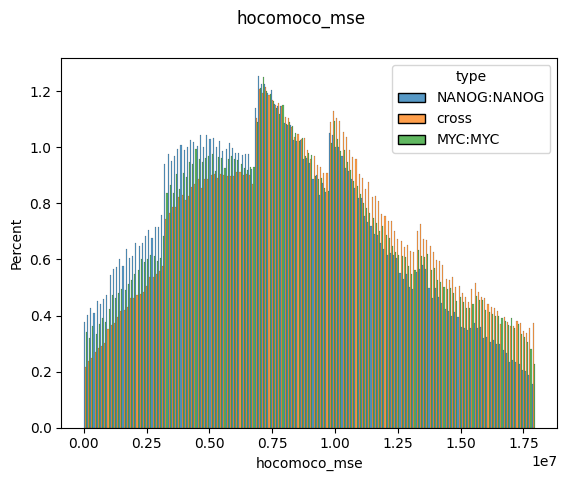

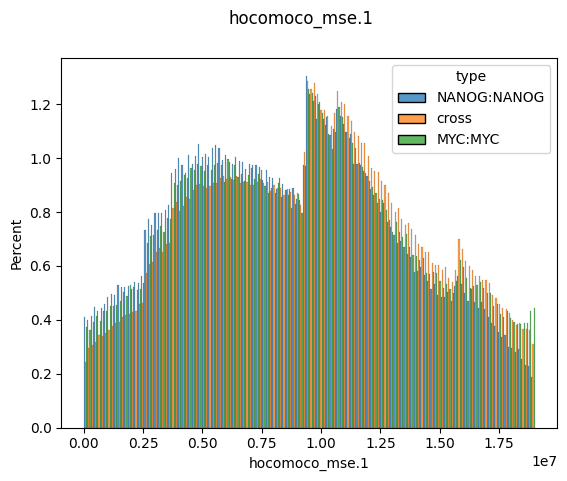

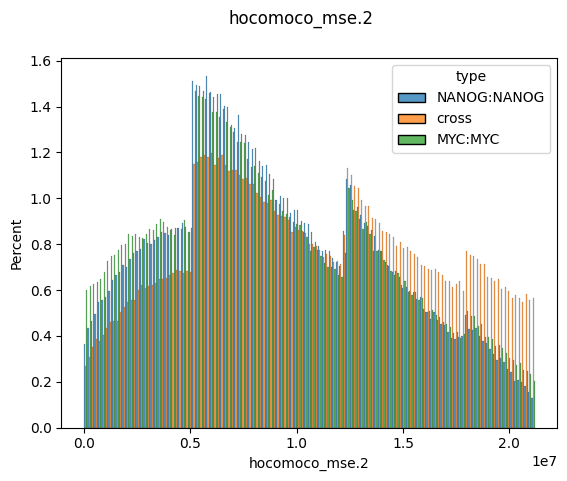

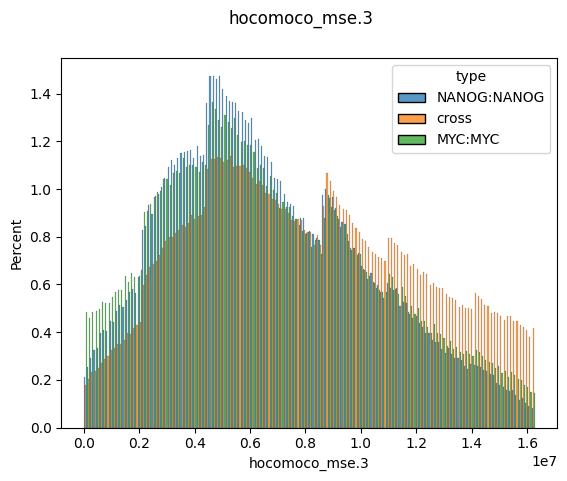

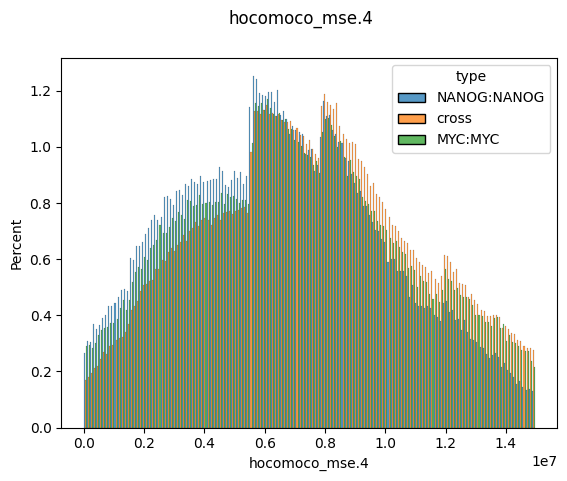

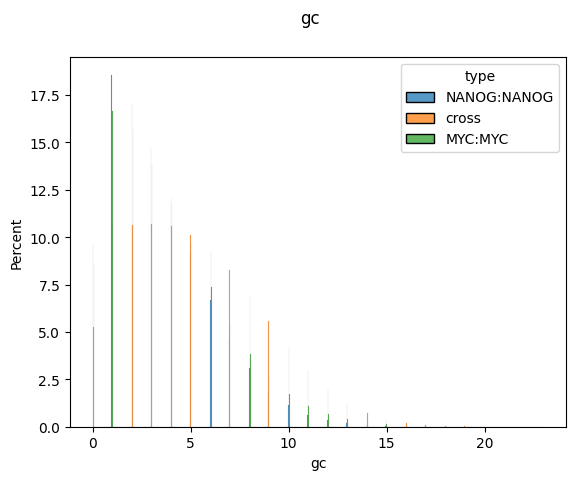

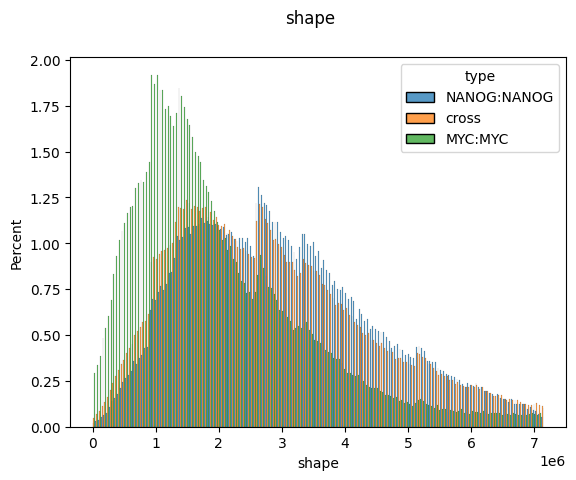

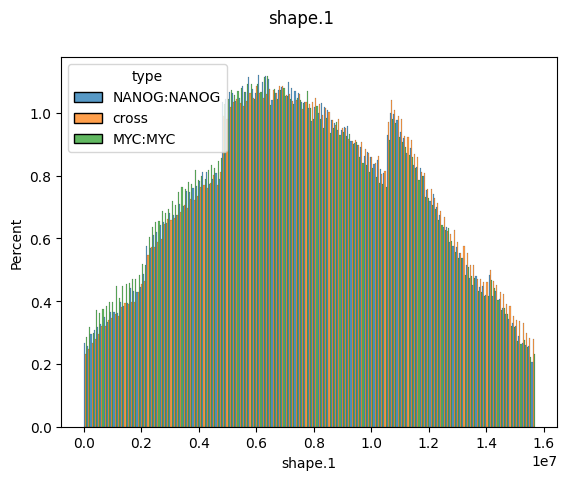

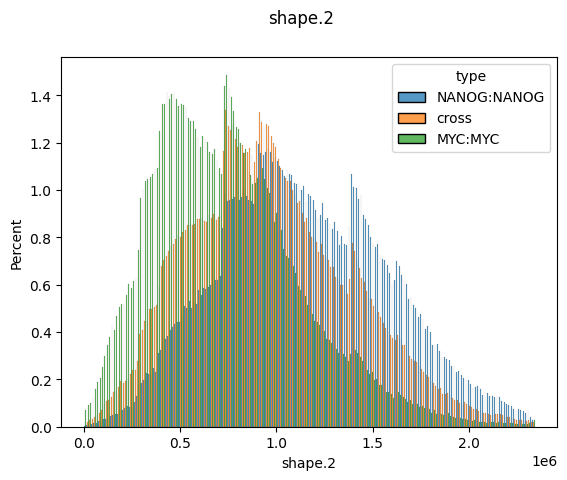

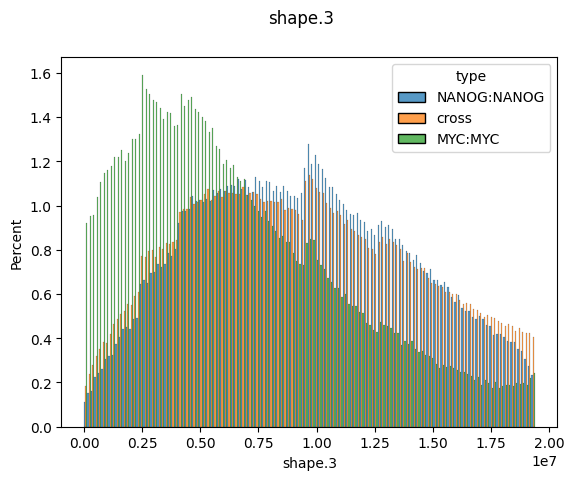

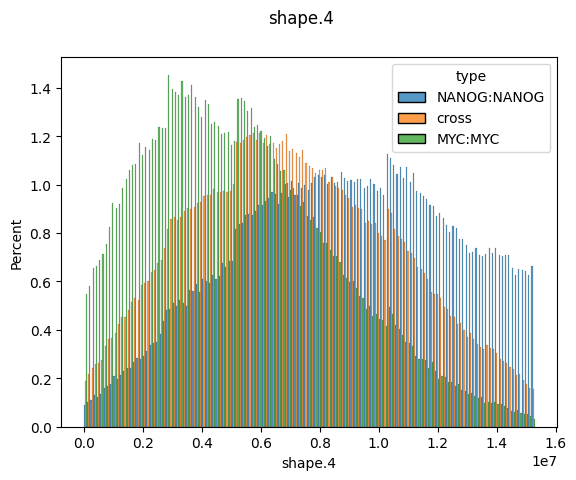

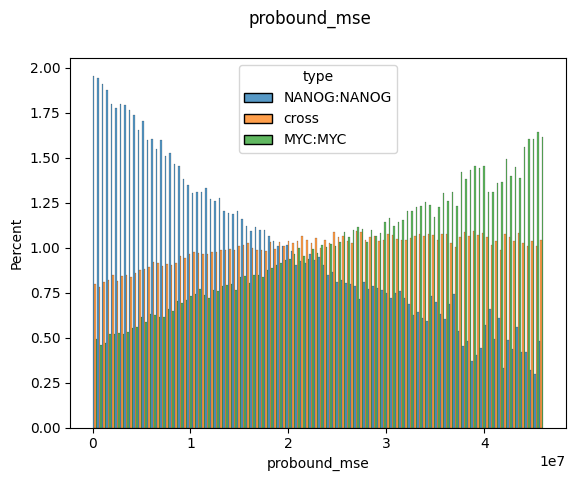

In [97]:
columns = ['hocomoco_mse', 'hocomoco_mse.1',
       'hocomoco_mse.2', 'hocomoco_mse.3', 'hocomoco_mse.4', 'gc', 'shape',
       'shape.1', 'shape.2', 'shape.3', 'shape.4', 'probound_mse']
for col in columns:
    sns.histplot(data=X, x=col, hue='type', stat='percent', common_norm=False, multiple="dodge")
    plt.suptitle(col)
    plt.show()

In [96]:
X[columns].values

array([[13386812, 14705171,  9763298, ...,  3430619, 10349836, 10915327],
       [14419904,  8765089, 10612193, ...,  8521317, 10141862, 15372961],
       [12199807, 13536409,  9820614, ...,  1676530,  6488038, 34253149],
       ...,
       [ 3156934,  5359650,  8098855, ...,  3869387,  3793230,  6437746],
       [ 5336332,  1950582,  7796952, ...,  1863919,  7648735,  8481919],
       [ 8671593,  6277013, 10704548, ...,  1030264,  5288795, 10309377]])